## Statistical Bias

[Definition of Bias](http://davidmlane.com/hyperstat/A9257.html)

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=14, 10

In [70]:
%matplotlib inline

### Location and Scale

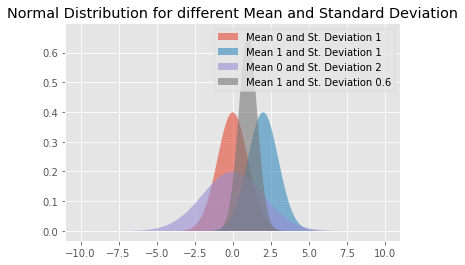

In [71]:
x = np.linspace (-10, 10, 1000)

plt.fill(x, ss.norm.pdf(x, loc = 0, scale = 1), label = 'Mean 0 and St. Deviation 1', alpha = 0.6, lw = 3)
plt.fill(x, ss.norm.pdf(x, loc = 2, scale = 1), label = 'Mean 1 and St. Deviation 1', alpha = 0.6, lw = 3)
plt.fill(x, ss.norm.pdf(x, loc = 0, scale = 2), label = 'Mean 0 and St. Deviation 2', alpha = 0.6, lw = 3)
plt.fill(x, ss.norm.pdf(x, loc = 1, scale = 0.6), label = 'Mean 1 and St. Deviation 0.6', alpha = 0.6, lw = 3)
plt.title('Normal Distribution for different Mean and Standard Deviation')
plt.legend();

Variation between sampling and population statistics. 

## Probability

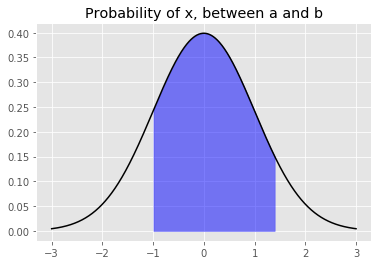

In [72]:
x = np.linspace (-3, 3, 1000)
y = ss.norm.pdf(x, loc = 0, scale = 1)
x_seg = x[np.logical_and(-1<x, x<1.4)]
y_seg = y[np.logical_and(-1<x, x<1.4)]
plt.plot(x, y, color = 'k')
plt.fill_between(x_seg, y_seg, color = 'b',  alpha = 0.5)
plt.title('Probability of x, between a and b');

## The Empirical Rule

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwY7Fpm8bzLdPfpxamqwFXPc-Dhn5JNqF7oL7Zuli8zZSMWTQz' width = 50% align = 'left'>

## Sampling DIstribution

In [73]:
np.set_printoptions(formatter = {'float':lambda x: '{0:6.3f}'.format(x)})
sampsize = 10
numsamps = 1000
sample = np.random.standard_normal((numsamps, sampsize))
print(sample)

[[ 0.470 -0.747 -0.341 ...  2.437 -1.538 -1.479]
 [-0.535 -0.923 -0.685 ... -0.475 -0.878  0.874]
 [ 0.781 -1.438 -0.932 ... -1.324  1.514  0.609]
 ...
 [-1.836  0.578 -0.098 ...  0.325 -0.642 -1.073]
 [ 0.053 -0.354  0.783 ...  0.581  0.650  0.040]
 [-0.758  0.589 -0.168 ... -1.229 -0.664  0.399]]


In [74]:
mean = sample.sum(axis=1) / (sampsize)
print(mean)

[-0.216 -0.297 -0.080 -0.409 -0.166  0.163 -0.345  0.230 -0.063 -0.405
 -0.423  0.464 -0.274  0.197  0.094 -0.026 -0.438 -0.373 -0.269  0.216
  0.403 -0.372  0.119 -0.199 -0.891  0.569  0.109  0.221 -0.457  0.110
  0.446  0.180  0.385 -0.152  0.113 -0.179  0.205  0.014  0.669  0.021
  0.386 -0.088 -0.069  0.418 -0.414 -0.101 -0.172  0.022 -0.023 -0.313
 -0.545 -0.213  0.269 -0.021 -0.097 -0.259  0.488  0.165 -0.140  0.744
  0.528 -0.127  0.541  0.366 -0.941 -0.004  0.053  0.283  0.636  0.339
 -0.225 -0.037  0.369  0.104  0.290 -0.277  0.039  0.129 -0.771  0.169
  0.289  0.279 -0.166  0.008  0.766  0.558  0.286 -0.443 -0.052  0.020
 -0.307 -0.244 -0.449  0.300 -0.085 -0.018 -0.245  0.805  0.149 -0.099
  0.514  0.171  0.477  0.137 -0.488  0.239 -0.028 -0.034  0.016  0.093
  0.047  0.062  0.087  0.416 -0.242  0.223  0.155  0.029  0.204 -0.042
 -0.364 -0.314 -0.017  0.124  0.368  0.246 -0.133  0.041  0.195 -0.346
  0.196  0.000 -0.371  0.024  0.162  0.071 -0.197  0.493 -0.293 -0.430
  0.54

In [75]:
vari = (sample - mean[:, np.newaxis])**2
vari = vari.sum(axis = 1)/(sampsize)

mean_var = vari.sum() / numsamps #Sample Variance calculation
print(mean_var)
print(mean_var * (sampsize/(sampsize - 1))) #Population Variance Calculation

0.8841082924954112
0.9823425472171237


In [76]:
vari = (sample - mean[:, np.newaxis])**2
vari = vari.sum(axis = 1)/(sampsize)
stdev = np.sqrt(vari)
mean_stdev = stdev.sum() / numsamps
print(mean_stdev)
print(mean_stdev * (sampsize/(sampsize - 1)))

0.9151557998616497
1.0168397776240554


I have simulated collecting 1000 samples of size 10 from the standard normal distribution. Using this type of estimate, the average of the sample is a good estimate for the average of the population.

#### Calculating the Standard Deviation - A word of warning

The Standard Deviation is the square root of the Variance. 

Typically calculate the variance first. Variance = Sum of the squared differences between the values and the mean, divided by the number of values.  

If you use that (sample) calculation to find the variance in a poplation, your result will be biased. It typically underestimates the variance of the population.  

[Bessel's Correction - Wikipedia Page](https://en.wikipedia.org/wiki/Bessel%27s_correction)

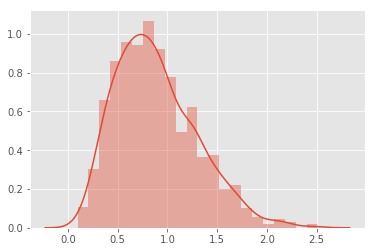

In [77]:
sns.distplot(vari);

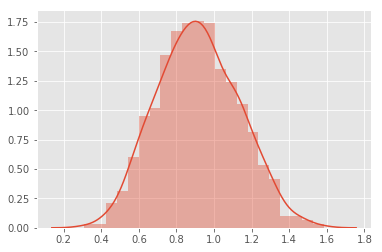

In [79]:
sns.distplot(stdev);

## End